In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
# Load data (source: https://huggingface.co/datasets/zefang-liu/phishing-email-dataset)
df = pd.read_csv("Data/Phishing_Email (Raw Data).csv")

In [5]:
df.shape

(18650, 3)

In [6]:
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [7]:

# Check column names
print("\n📋 Columns:", df.columns.tolist())

# Check for missing values
print("\n🔍 Missing values:\n", df.isnull().sum())

# Check class distribution
print("\n⚖️ Class distribution:")
print(df['Email Type'].value_counts(normalize=True) * 100)

# Check for duplicates
print("\n🔍 Duplicated rows:", df.duplicated().sum())

# Check unique ID consistency
print("\n🔎 Unique Email No.:", df['Unnamed: 0'].nunique(), "/", len(df))


📋 Columns: ['Unnamed: 0', 'Email Text', 'Email Type']

🔍 Missing values:
 Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

⚖️ Class distribution:
Email Type
Safe Email        60.707775
Phishing Email    39.292225
Name: proportion, dtype: float64

🔍 Duplicated rows: 0

🔎 Unique Email No.: 18650 / 18650


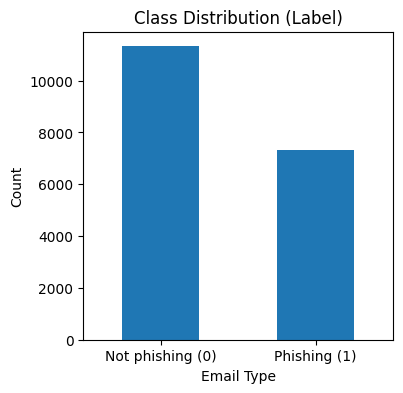

In [8]:
# Optional: visualize class distribution
plt.figure(figsize=(4,4))
df['Email Type'].value_counts().plot(kind='bar', title='Class Distribution (Label)')
plt.xticks(ticks=[0, 1], labels=['Not phishing (0)', 'Phishing (1)'], rotation=0)
plt.ylabel("Count")
plt.show()

In [9]:
# Remove rows where Email Text is missing
df_clean = df.dropna(subset=['Email Text'])
# Remove rows where Email Text is empty or only whitespace (incl. \n, \t)
df_clean = df_clean[df_clean['Email Text'].str.strip().astype(bool)]

In [10]:
df_clean.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [11]:

#  Define features (X) and target (y)
X = df_clean[['Email Text']]  #  text as features
y = df_clean['Email Type']   # target for stratification


In [12]:

# Perform 70-30 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)


In [13]:
# Combine X and y for convenient inspection
train_df = X_train.copy()
train_df['Label'] = y_train

test_df = X_test.copy()
test_df['Label'] = y_test

print("\nFinal splits:")
print("Train:", train_df.shape)
print("Test:", test_df.shape)




Final splits:
Train: (13041, 2)
Test: (5590, 2)


In [14]:
# Save files
train_df.to_csv("Data/train.csv", index=False)
test_df.to_csv("Data/test.csv", index=False)